In [14]:
import onetick.query as otq
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.width', 200)

In [15]:
results = otq.run('otq/Q1_Basics.otq::Passthrough')
#print(results['TRAIN_C_QTE_TRD::BLV'].data)
#df = pd.DataFrame(results['DEMO_L1::AA'])
df = pd.DataFrame(results['TRAIN_C_QTE_TRD::BLV'])

KeyError: 'TRAIN_C_QTE_TRD::BLV'

In [10]:
results


SymbolNumpyResultMap({'DEMO_L1::AA': {'PASSTHROUGH': ({'Time': array(['2003-12-01T15:00:00.000000', '2003-12-01T15:00:01.000000',
       '2003-12-01T15:00:01.000000', ..., '2003-12-01T22:13:20.000000',
       '2003-12-01T22:21:19.000000', '2003-12-01T22:28:39.000000'],
      dtype='datetime64[us]'), 'PRICE': array([33.25  , 33.25  , 33.25  , ..., 33.93  , 33.93  , 33.8008]), 'ORIG_TS': array(['2003-12-01T14:59:59.000000000', '2003-12-01T15:00:01.000000000',
       '2003-12-01T15:00:01.000000000', ...,
       '2003-12-01T22:13:20.000000000', '2003-12-01T22:21:19.000000000',
       '2003-12-01T22:28:39.000000000'], dtype='datetime64[ns]')}, [])}})

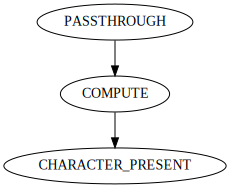

In [25]:
#eXERCISE

                
symbol = 'FULL_DEMO_L1::IBM'
start_date = datetime(2003,1,12,9,30)
end_date = datetime(2003,1,12,16)
#interval = 300

#create EPs
pt = otq.Passthrough(fields='PRICE').tick_type('TRD') 
compute = otq.ComputeEp(compute='AVERAGE,STDDEV,HIGH,LOW, VWAP', show_all_fields=True, bucket_interval=interval, is_running_aggr=True)
#add_fields = otq.AddFields(fields=BANDS)
#buy_update_field = otq.UpdateField(field='SIGNAL', value='"BUY"', where='PRICE<LBAND and PRICE[-1] >= LBAND[-1]')
#sell_update_field = otq.UpdateField(field='SIGNAL',value='"SELL"', where='PRICE > UBAND and PRICE[-1]<=UBAND[-1]')
where = otq.CharacterPresent(discard_on_match=True, field='COND', characters='B')

#construct the graph via a utility method
g = otq.Graph(otq.Chainlet(pt,compute,where))

#render constructed graph
g.render()

#run the graph for multiple values of compute bucket


In [27]:
for i in (300,600,900):
    compute.bucket_interval = i

    #run query and post-process
    data = otq.run(g,[symbol],start_date,end_date)
    df = pd.DataFrame(data[symbol])
    pd.set_option('display.width', 100)
    print(df.head())
    df[['AVERAGE','STDDEV']].plot(figsize=(12,7))
    plt.show()

Empty DataFrame
Columns: []
Index: []


KeyError: "['AVERAGE' 'STDDEV'] not in index"

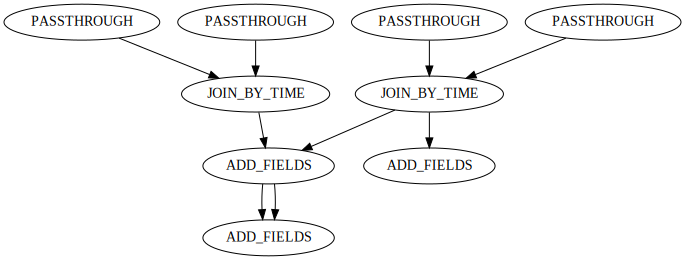

In [41]:
symbol='FULL_DEMO_L1::GS'
start=datetime(2005,1,3,9,30)
end = datetime(2005,1,3,16)

trds = otq.Passthrough(fields='PRICE').tick_type('TRD').node_name('t')
qtes = otq.Passthrough(fields='BID_PRICE,ASK_PRICE').tick_type('QTE').node_name('q')
#num_ticks = otq.NumTicks(is_running_aggr=True,output_field_name='TICK_ID')

join = otq.JoinByTime(leading_sources='t')
trds >> join << qtes
join >> otq.AddFields(fields='MID = (BID_PRICE.VALUE + ASK_PRICE.VALUE)/2')
#b = otq.AddFields(fields='DIFF = (MID.VALUE - PRICE.VALUE)/2')

graph = otq.Graph(join)
g = otq.Graph(otq.Chainlet(join,a,b))
# render graph
graph.render()



In [43]:
df

,t.TIMESTAMP,t.PRICE,q.TIMESTAMP,q.BID_PRICE,q.ASK_PRICE
Time,,,,,
2005-01-03 14:31:52.011,2005-01-03 14:31:52.011,104.900,2005-01-03 14:31:52,0.01,999.00
2005-01-03 14:31:53.008,2005-01-03 14:31:53.008,104.900,2005-01-03 14:31:53,104.64,105.00
2005-01-03 14:31:53.508,2005-01-03 14:31:53.508,104.900,2005-01-03 14:31:53,104.64,105.00
2005-01-03 14:31:53.511,2005-01-03 14:31:53.511,104.900,2005-01-03 14:31:53,104.64,105.00
2005-01-03 14:31:53.515,2005-01-03 14:31:53.515,104.900,2005-01-03 14:31:53,104.64,105.00
2005-01-03 14:31:56.008,2005-01-03 14:31:56.008,104.900,2005-01-03 14:31:56,104.74,105.37
2005-01-03 14:31:56.012,2005-01-03 14:31:56.012,104.900,2005-01-03 14:31:56,104.74,105.37
2005-01-03 14:31:56.015,2005-01-03 14:31:56.015,104.900,2005-01-03 14:31:56,104.74,105.37
2005-01-03 14:31:56.018,2005-01-03 14:31:56.018,104.900,2005-01-03 14:31:56,104.74,105.37


In [42]:
data = otq.run(graph,symbol,start,end)
df = pd.DataFrame(data[symbol])
df.set_index('Time',inplace=True)
df[['DIFF']].plot(figsize=(12,7))
plt.show()
df.tail()

ValueError: Multiple output EventProcessors have same node_name: ADD_FIELDS